## Adagrad
Until now the learning rate $(\alpha)$ is same for all iteration and same learning rate for all the input x vales (x1,x2,x3,...)
if some feature has sparse vector( most of thr values are 0 only few values have 1) and if the learning rate is constant means for the sparse vector column the weights will not update in most of the case

if x1 = [1,0,0,1,0,0,0,0,0,1], x2 = [1,0.8,34,382,....] and loss function is MSE and it's derivation is $2*x*error$

x1 is sparse and x2 is dense

Our weight updation fourmula is $wx1=wx1-learningRate * \nabla err$,

$\nabla err = 2 * x1 * err$ if x1 is 0 means gradient also 0 so the weight updation will not  happen $wx1=wx1-learningRate * (2 * 0 * err) = wx1 - 0 = wx1$

Our weight updation fourmula is $wx2=wx2-learningRate * \nabla err$, 

$\nabla err = 2 * x2 * err$ for x2 the values are dense vector so weight updation will happen all the times. for dense column weights are updating fast $wx2=wx2-learningRate * (2 * some\_value * err) = wx1 - some\_value = change\_in\_weight$

Due to the issue of sparse vetcor some feature has slow learning. To solve this issue Adagrad will calculate different learning rate for different feature (x1, x2, x3,...)

Adagrad will reduce the learning rate if previous weight is updated

In adagrad if a feature is updating means reduce the learning rate, else maintain the learning rate

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Adagrad
$$
Gx = \sum_{i=0}^{n} \nabla x^i * \nabla x^i\\
lrCalc = \frac{\eta}{\sqrt{Gx + \epsilon}} \\
w^i = w^i - lrCalc * \nabla x^i
$$

$$
\eta \rightarrow constatnt\ learning\ rate \\
\epsilon \rightarrow small\ constant\ value\ to\ avoid\ zero\ division \\
\nabla x^i \rightarrow gradient\ at\ the\ i^{th}\ iteration
$$

In [2]:
# check nature of algorithm
def check(gradient,lr = 0.01):

    lr = lr / math.sqrt(( (gradient * gradient)) + 0.000001)
    print(f"Learning Rate {lr}, Weight {gradient}")
    return lr

In [3]:
for i in range(10):
    check(i,0.01)

Learning Rate 10.0, Weight 0
Learning Rate 0.00999999500000375, Weight 1
Learning Rate 0.0049999993750001175, Weight 2
Learning Rate 0.003333333148148164, Weight 3
Learning Rate 0.002499999921875004, Weight 4
Learning Rate 0.001999999960000001, Weight 5
Learning Rate 0.001666666643518519, Weight 6
Learning Rate 0.0014285714139941695, Weight 7
Learning Rate 0.001249999990234375, Weight 8
Learning Rate 0.0011111111042524007, Weight 9


##### From this what clearly visible is if i increase learning rate decrease  

When the weights are updates the learning rate will decrease. If a field value is sparse more num of 0 is present means it's weight is not update so no change in learning rate

In [4]:
lr = 0.01
for i in [1,0,0,1,0,0,1]:
    lr  = check(i,lr)

Learning Rate 0.00999999500000375, Weight 1
Learning Rate 9.99999500000375, Weight 0
Learning Rate 9999.99500000375, Weight 0
Learning Rate 9999.990000009999, Weight 1
Learning Rate 9999990.000009999, Weight 0
Learning Rate 9999990000.009998, Weight 0
Learning Rate 9999985000.018747, Weight 1


In [5]:
def fun(x):
    '''
    x : value
    '''
    return x**2

def grad_fun(x):
    '''
    x : value
    '''
    return (2 * x + 0.00001)

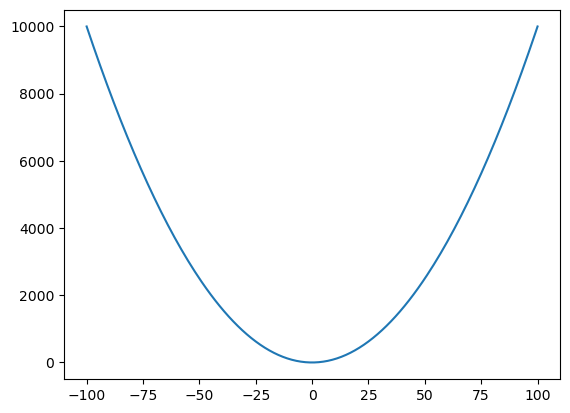

In [6]:
#test place
x = range(-100,101)
y = [fun(i) for i in x]
plt.plot(x,y)
plt.show()

88.1999999
86.435999802
84.70727970595999
83.01313401184079
81.35287123160397
79.72581370697189
78.13129733283246
76.56867128617581
75.0372977604523
73.53655170524326


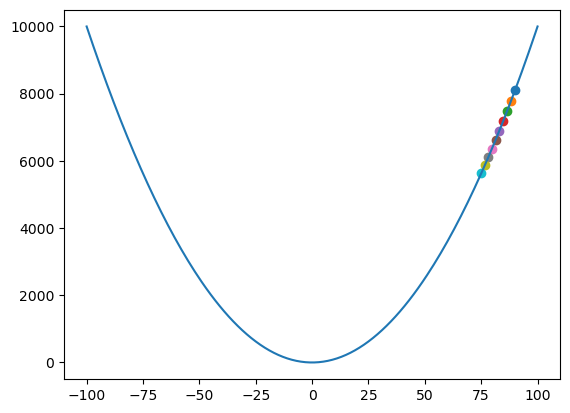

In [7]:
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    x1 = x1 -( 0.01 * grad_fun(x1))
    y1 = fun(x1)
    print(x1)
plt.show()

0.05555555246827864 80.00000000015432
0.04152273749238517 73.3563615861325
0.035460851804005614 68.15380309735019
0.031926826999693174 63.801933416361415
0.029567280616034045 60.02903378235445
0.027863792675186863 56.683760400109904
0.026569701230903305 53.671618977462835
0.025550819605566752 50.928911013090904
0.024727121316451214 48.410260043548796
0.02404755853551803 46.08196267883943
0.02347784738720973 43.918151869907184
0.022994004892245686 41.89844324205706
0.02257868965185297 40.0064191225538
0.022219014240504615 38.22861250797242
0.021905177672125686 36.55380319062868


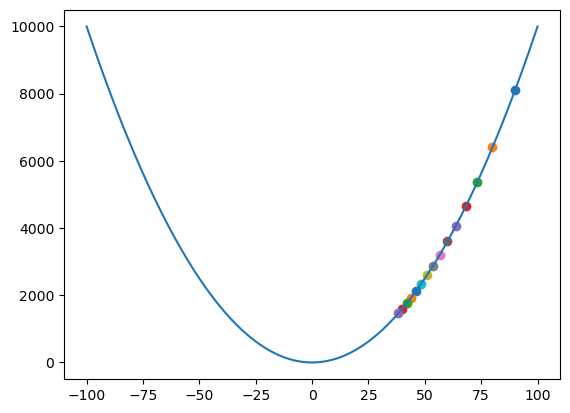

In [8]:
x1 = 90
y1 = fun(x1)
gsum = 0
lr = 0
plt.plot(x,y)
for i in range(15):
    plt.scatter(x1,y1)
    g = grad_fun(x1)
    gsum =  gsum + (g * g)
    lr = 10/math.sqrt(gsum + 0.000001)
    x1 = x1 - ( lr * g)
    y1 = fun(x1)
    print(lr, x1)
plt.show()

Initially learning rate is large and in last learning rate is small
Due to continous updation learning rate is continously reducing, so learning is very slow

If the initial gradients are large, the learning rates will be low for the remainder of the training.

# Adadelta


My learning will more depend upon the local conditions rather than the whole. So that I will motivate towards my goal based upon the recent observations rather than all.


Adadelta will maintain some learning rate based on history like momentum, It is upgrade of adadelta. It uses exponentially weighted moving average 

This one has no explicit learning rate like other alogorithm


$$
EWAg = 0 \\
EWAw = 0 \\
wup = 0 \\

calculate EWA for gradient \\

EWAg = \beta * EWA{g-1} + ((1 - \beta) * (\nabla w_i * \nabla w_i))\\
lr = \frac{\sqrt{EWAw + \epsilon}}{\sqrt{EWAg + \epsilon}} \\
wup = lr * \nabla w_i \\
EWAw = \beta * EWA{w-1} + ((1 - \beta) *( wup * wup))\\
w = w - EWAw \\
$$

1.7568208247118986e-06 89.99968377223398
1.8024634679127437e-06 89.9993593299317
1.833786813105117e-06 89.99902925063671
1.8580984576333713e-06 89.99869479650324
1.8782720620075542e-06 89.99835671241635
1.8957276667509626e-06 89.99801548764783
1.911269352560106e-06 89.99767146673113
1.9253958483379827e-06 89.99732490442588
1.9384373990056033e-06 89.99697599604569
1.950623726818254e-06 89.99662489555274


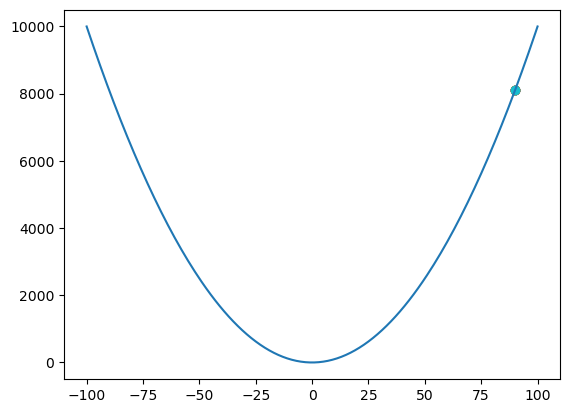

In [15]:
x1 = 90
y1 = fun(x1)
beta = 0.9
ewag = 0
ewax = 0
x_up = 0
eplison = 0.00000001
plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)
    g = grad_fun(x1)
    ewag = (beta * ewag) + ((1 - beta) * (g ** 2)) # EWA of gradient 
    lr = math.sqrt(ewax + eplison) / math.sqrt(ewag + eplison) #learning rate calculate
    x_up = lr * g # gradient and weight updation calculation
    ewax = (beta * ewax) + ((1 - beta) * (x_up ** 2)) # EWA of x_up
    x1 = x1 - ewax
    y1 = fun(x1)
    print(lr, x1)
plt.show()

# RMS Prop
Root Mean Square propogation
Mini batch or Sophisticated Gradient Descent had a lot of osscilation (loss higher and lower) due to the randmon sample and the converging time also very slow.  
RMS prop will take the weighted average of gradient and divide by current gradient

$$
Vx_t = (\beta * Vx_{t-1}) + (1 - \beta) * (\nabla x * \nabla x) \\
x = x - (lr / \sqrt{Vx_t + \epsilon}) * \nabla x \\
$$

58.37722340319626
40.52903373829666
28.456718141515026
19.858472304154503
13.656465566807839
9.205458171096959
6.058556970715494
3.880580136145872
2.411685555185117
1.4498678525154103


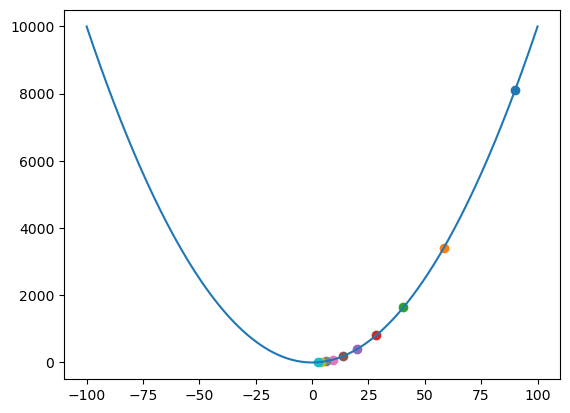

In [10]:
x1 = 90
ewa = 0
lr = 10
beta = 0.9
y1 = fun(x1)

plt.plot(x,y)
for i in range(10):
    plt.scatter(x1,y1)

    grad = (2 * x1 + 0.00001)
    ewa = (beta * ewa ) + ((1 - beta) * (grad * grad))
    lrgrad = lr/math.sqrt(ewa + 0.000001)
    x1 = x1 - (lrgrad * grad)
    y1 = fun(x1)
    print(x1)
plt.show()

Next [Adam](./Adam.ipynb)